# scriptbase topic model

In [1]:
import pandas as pd
import numpy as np

friends = pd.read_csv('../transcripts and metadata/friends_mastersheet.csv', index_col=0)
friends.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,...,Phoebe,Ross,Rachel,Carol,Susan,Janice,Mike,Gunther,Ben,Emily
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,...,0.061248,0.144114,0.155643,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,...,0.061500,0.248342,0.165269,0.088068,0.044696,0.000000,0.0,0.0,0.0,0.0
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,...,0.145415,0.125624,0.102383,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,...,0.111161,0.151849,0.162042,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,...,0.095007,0.150061,0.141764,0.000000,0.000000,0.047483,0.0,0.0,0.0,0.0


In [2]:
np.mean(friends['len_prep'])

686.228813559322

## Some checks

In [3]:
# 5 least popular Friends episodes

check = friends.sort_values(by='Stars')

for i in range(5):
    row = check.iloc[i]
    episode = row['Episode Number']
    name = row['Episode_Title']
    season = row['Season']
    summary = row['Summary']
    stars = row['Stars']
    print(f'season {season} episode {episode} , "{name}" rating = {stars} stars: \n\n {summary}\n')

season 4 episode 21 , "The One with the Invitation" rating = 7.2 stars: 

 As Ross and Emily send out wedding invitations, he and Rachel each look back on their relationship together while Joey and Chandler look for a purpose in life.

season 6 episode 20 , "The One with Mac and C.H.E.E.S.E." rating = 7.4 stars: 

 Chandler forgets to write down a message for Joey when the time of his audition for the lead in a TV show is changed.

season 8 episode 19 , "The One with Joey's Interview" rating = 7.5 stars: 

 Joey prepares for his epic interview with Soap Opera Digest, reminiscing about his past acting experiences, his friends and his romantic life.

season 7 episode 21 , "The One with the Vows" rating = 7.5 stars: 

 Monica and Chandler are getting married in four weeks and have to write their vows, but neither has a clue what to say, so they reflect on their past.

season 9 episode 10 , "The One with Christmas in Tulsa" rating = 7.5 stars: 

 Chandler must spend Christmas in Tulsa, whi

In [4]:
# 5 most popular Friends episodes

check = friends.sort_values(by='Stars', ascending=False)

for i in range(5):
    row = check.iloc[i]
    episode = row['Episode Number']
    name = row['Episode_Title']
    season = row['Season']
    summary = row['Summary']
    stars = row['Stars']
    print(f'season {season} episode {episode} , "{name}" rating = {stars} stars: \n\n {summary}\n')

season 10 episode 18 , "The Last One: Part 2" rating = 9.7 stars: 

 Phoebe races Ross to the airport in a bid to stop Rachel from leaving for Paris. Monica and Chandler pack up their apartment ahead of their move to their new house, and Joey buys Chandler a new chick and duck as a leaving present.

season 5 episode 14 , "The One Where Everybody Finds Out" rating = 9.7 stars: 

 When Phoebe finds out about Monica and Chandler, she and Rachel attempt to get them to confess their relationship.

season 10 episode 17 , "The Last One: Part 1" rating = 9.5 stars: 

 Erica gives birth to the baby that Monica and Chandler are adopting. However, there's one small added surprise. Meanwhile, Ross and Rachel sleep together one last time before Rachel leaves ...                See full summary »

season 4 episode 12 , "The One with the Embryos" rating = 9.5 stars: 

 Phoebe's uterus is examined for implantation of the embryos. Meanwhile, a seemingly harmless game between Chandler and Joey against M

## prep

In [5]:
import glob
import random
RND = 12345
random.seed(RND)

class Chunker(object):
    def __init__(self, filenames, metadata, singles_only=False,
                 max_chars_per_book=None, chunk_size=None):
        
        # maximum number of characters to read from the beginning of each book:
        self.max_chars_per_book = max_chars_per_book
        
        # size of the chunks returned (in tokens):
        self.chunk_size = chunk_size
        
        # only return chunks from these files:
        self.filenames = filenames
        
        # include a dictionary with metadata:
        self.meta = meta
        
        # only return texts with a single genre label:
        self.singles_only = singles_only
        
        # only collect genres during the first iteration
        self.first = True

    def __iter__(self):
        if self.first:
            self.genres = []
        
        for filename in self.filenames:
            title = os.path.basename(filename[:-4])
            current_genres = self.meta[title]
            
            if self.singles_only:
                if len(current_genres) > 1:
                    continue

            with open(filename, 'r', encoding='utf-8') as f:
                try:
                    if self.max_chars_per_book:
                        text = f.read()
                        text = text[:self.max_chars_per_book]
                    else:
                        text = f.read()
                except:
                    continue
            
            tokens = text.split()
            
            for i in range(0, len(tokens), self.chunk_size):
                if self.first:
                    self.genres.append(current_genres)
                yield tokens[i:i + self.chunk_size]
                #this also helps for lazy loading because yield goes over it apart
        
        # stop collecting labels after first complete iteration
        self.first = False

In [6]:
n_features = 5000 # number of most common words
n_topics = 30 # number of topics
n_top_words = 60 # number of characteristic words per topic (viz purposes only)
max_df = 0.5 # maximum document frequency
min_df = 100 # minimum document frequency
max_books = 1000 # include all books (None), or a specific number
chunk_size = 686  # length of the average friends episode (after keeping only ADJ, NOUN & VERB)

In [7]:
path = '../scriptbase/scriptbase_texts/*.txt'
filenames = sorted(list(glob.glob(path)))
print(len(filenames))

865


In [8]:
random.seed(RND)
random.shuffle(filenames)
# print(filenames[:10])
# print(len(filenames))

In [9]:
import json
with open('../scriptbase/scriptbase_meta.json', 'r') as f:
    meta = json.loads(f.read())

# for book, genres in list(meta.items())[:20]:
#     print(f"{book} -> {' - '.join(sorted(genres))}")

## NMF

In [10]:
import os
import joblib
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def identity(x):
    return x

chunks = Chunker(filenames, meta,
                 chunk_size=chunk_size,
                 max_chars_per_book=None)


# vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df,
#                              max_features=n_features,
#                              analyzer=identity)

vectorizer = joblib.load('sc_vectorizer.sav')

X = vectorizer.transform(chunks)

from sklearn.decomposition import NMF
# nmf = NMF(n_components=300,
#           random_state=RND,
#           verbose=1, max_iter=100).fit(X) # fit NMF model with TF-IDF feature

# import joblib
# joblib.dump(vectorizer, 'sc_vectorizer.sav')
# joblib.dump(nmf,'nmf_scriptbase_friends.sav')
nmf = joblib.load('nmf_scriptbase_friends.sav')

In [11]:
joblib.dump(vectorizer.vocabulary_, 'sc_vectorizer_vocab.sav')
vectorizer.get_feature_names_out()
joblib.dump(vectorizer.get_feature_names_out(), 'sc_features_names.sav')

['sc_features_names.sav']

In [14]:
for topic_idx, topic in enumerate(nmf.components_[:10]):
    top_idxs = np.argsort(topic)[::-1][:10]
    top_words = np.array(vectorizer.get_feature_names())[top_idxs]
    print(f'topic {topic_idx}:', ' - '.join(top_words))

topic 0: knew - saw - went - loved - died - took - looked - felt - called - gave
topic 1: fuck - fucked - motherfucker - asshole - bitch - fucker - dick - bullshit - fuckin - fucks
topic 2: nuclear - weapons - russian - intelligence - military - american - attack - report - strike - political
topic 3: ai - talkin - comin - gettin - tryin - folks - mama - askin - seen - damn
topic 4: son - bitch - loves - sons - today - department - easy - swear - favor - fault
topic 5: ship - crew - space - mission - event - bridge - main - command - systems - prepare
topic 6: looks - turns - pulls - sees - nods - sits - walks - opens - takes - stares
topic 7: dad - parents - junior - proud - making - bike - swear - pass - tried - nuts
topic 8: players - field - pitch - smiles - strike - fans - nods - beat - toast - stares
topic 9: money - cash - pay - grand - vegas - paid - bills - bucks - rich - wants


c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
nmf.verbose = 1
X_ = nmf.transform(X)
print(X_.shape)

violation: 1.0
violation: 0.19515034261449565
violation: 0.04086806522054348
violation: 0.010722161918713377
violation: 0.00209193328993231
violation: 0.0007346761763469093
violation: 0.00014395115204247084
violation: 5.5535829877266146e-05
Converged at iteration 9
(4263, 300)


In [33]:
from sklearn.feature_selection import f_classif

genres = [g[0] for g in chunks.genres]
feature_names = vectorizer.get_feature_names()

for genre in set(genres):
    print(f'-> genre {genre}:')
    y = [1 if g == genre else 0 for g in genres]
    # univariate feature selection with F-test for feature scoring
    F, pval = f_classif(X_, y)
    
    # indices of three best topics
    for topic_idx in np.argsort(F)[::-1][:3]:
        topic = np.nan_to_num(nmf.components_[topic_idx])
        words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
        print('   ' + f't{topic_idx}' + ' - '.join(words))

c:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


-> genre independent:
   t145pin - tale - straight - junk - crew - blow - locker - took - saw
   t164yeah - hey - hi - weird - turning - practice - match - crazy - quit
   t227fucking - mate - bullshit - fucked - fuck - saying - fucker - balls - bit
-> genre horror:
   t285death - fear - died - design - list - nightmare - alive - accident - meaning
   t192body - found - bodies - alive - funeral - saw - pain - disease - buried
   t60blood - flesh - eyes - cut - cure - bone - hand - brought - knife
-> genre period:
   t17bill - board - theater - points - sonofabitch - settle - dollar - gang - crime
   t3ai - talkin - comin - gettin - tryin - folks - mama - askin - seen
   t118shot - hit - shooting - shots - bullet - rifle - coulda - heard - range
-> genre animation:
   t121o - h - m - e - cowboy - t - s - g - german
   t176princess - true - american - rescue - ugly - flower - beautiful - beauty - soldier
   t199earth - plant - space - e - read - face - snow - peace - fought
-> genre myst

In [15]:
import pandas as pd
nmf.verbose = 0

texts = [value.split() for value in friends.text.values]

scores = nmf.transform(vectorizer.transform(texts))  # transform the HP chapters according to the fitted NMF model
scores.shape
# print(scores)

(236, 300)

In [16]:
df_scores = pd.DataFrame(scores, columns=[f't{i}' for i in range(scores.shape[1])])
friends2 = friends.join(df_scores)
friends2.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes,match,...,t290,t291,t292,t293,t294,t295,t296,t297,t298,t299
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440,11,...,0.000000,0.036589,0.003537,0.000000,0.000000,0.016953,0.000000,0.00000,0.0,0.000000
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888,12,...,0.000000,0.018084,0.000000,0.013036,0.000000,0.000633,0.002123,0.00000,0.0,0.001601
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605,13,...,0.000901,0.018507,0.000000,0.000000,0.003711,0.000000,0.000000,0.00000,0.0,0.000000
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468,14,...,0.001811,0.036734,0.004993,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000174
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438,15,...,0.000000,0.036067,0.009392,0.001201,0.006378,0.004056,0.000000,0.00073,0.0,0.000000


In [17]:
friends2.to_csv('friends_scriptbase_topics.csv')

In [16]:
from operator import itemgetter
from scipy.stats import kendalltau

ranks = range(1, len(friends2.index)+1)
tau_scores = []
for col in [f't{i+1}' for i in range(scores.shape[1])]:
    tau, p = kendalltau(ranks, friends2[col].tolist())
    tau_scores.append((col, tau))
    
tau_scores.sort(key=itemgetter(1))
nb = 6
top, bottom = tau_scores[:nb], tau_scores[-nb:]
print(tau_scores[:10]) # print 10 topics with lowest Tau score

[('t73', -0.167757468956831), ('t264', -0.1608451380876532), ('t149', -0.15980171434179335), ('t171', -0.15058535768290823), ('t296', -0.14224731734228574), ('t262', -0.13386252497225362), ('t146', -0.12919156882550892), ('t258', -0.12308846835086237), ('t207', -0.1182035718854015), ('t276', -0.11579501528286255)]


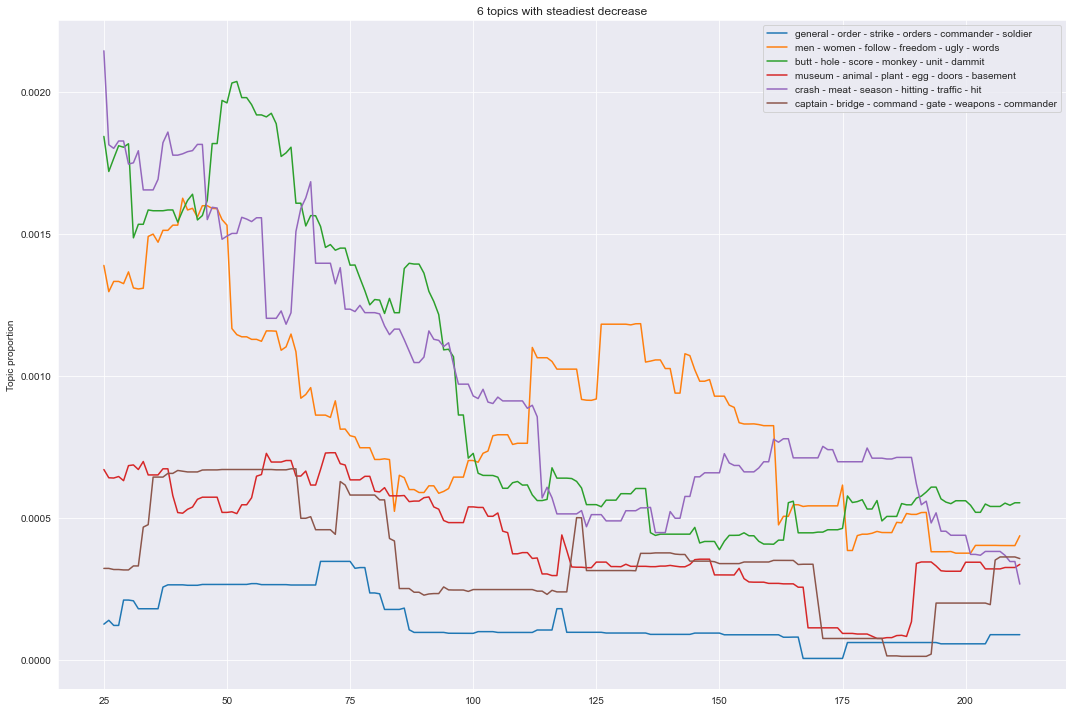

In [17]:
import matplotlib.pyplot as plt

import seaborn as sb
feature_names = vectorizer.get_feature_names_out()
fig = plt.figure(figsize=(15, 10))
sb.set_style("darkgrid")
for (feat, tau), col in zip(top, sb.color_palette("Set1")[:nb]):
    topic = nmf.components_[int(feat.replace('t', '')) - 1, :]
    words = [feature_names[i] for i in topic.argsort()[:-6-1:-1]]
    label = ' - '.join(words)
    friends2[feat].rolling(window=50, center=True).mean().plot(label=label)
plt.xlabel('', fontsize=10)
plt.ylabel('Topic proportion', fontsize=10)
plt.title(f'{nb} topics with steadiest decrease')
plt.tight_layout()
plt.legend();

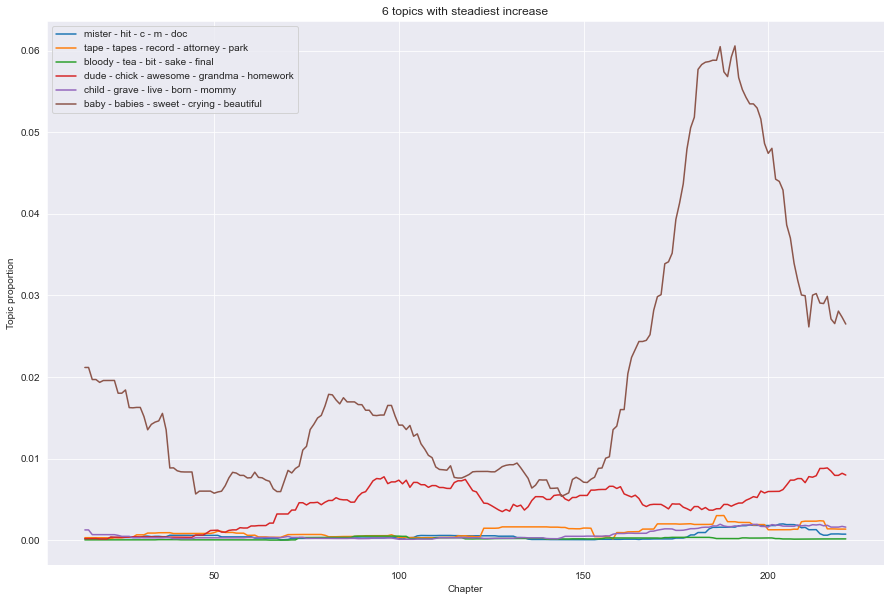

In [18]:
fig = plt.figure(figsize=(15, 10))
sb.set_style("darkgrid")
for (feat, tau), col in zip(bottom, sb.color_palette("Set1")[:nb]):
    topic = nmf.components_[int(feat.replace('t', '')) - 1, :]
    words = [feature_names[i] for i in topic.argsort()[:-5-1:-1]]
    label = ' - '.join(words)
    friends2[feat].rolling(window=30, center=True).mean().plot(label=label)
plt.xlabel('Chapter', fontsize=10)
plt.ylabel('Topic proportion', fontsize=10)
plt.title(f'{nb} topics with steadiest increase')
plt.legend();

In [19]:
#25 most predictive topics

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())


y = friends2.Stars
# univariate feature selection with F-test for feature scoring
F, pval = f_regression(X, y)
    
    
for topic_idx in np.argsort(F)[::-1][:25]:
    topic = np.nan_to_num(nmf.components_[topic_idx])
    words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    print(f't{topic_idx}: ' + ' - '.join(words))

t26: plane - flight - pilot - fly - flying - airport - landing - flew - trip
t233: summer - girlfriend - sensitive - beach - loved - throw - crap - favorite - garage
t276: job - working - fired - quit - months - pay - easy - jobs - week
t12: minutes - seconds - hours - ready - hold - hour - moving - second - close
t204: forget - realize - legal - available - gets - comes - watch - matter - drop
t287: dear - tea - suppose - sort - wish - hand - poor - present - excuse
t191: prison - sentence - jail - crime - guards - terrific - cell - escape - free
t132: write - writer - writing - read - wrote - script - paper - page - written
t239: stock - buy - firm - sell - market - selling - month - buying - sale
t288: cops - dope - jail - package - rat - mob - street - warrant - knows
t32: news - network - television - week - division - air - share - mad - middle
t205: business - deal - meeting - meet - personal - heard - interested - sign - offer
t299: rock - band - roll - magazine - stone - rolli

### Predictions 
#### setting baselines

In [20]:
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import train_test_split

X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

cv = LeaveOneOut()

dummy_regr = DummyRegressor(strategy="mean")

scores = cross_val_score(dummy_regr, X, y, cv=cv, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))


-0.3113667508113955 0.24655333378118335


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X = friends['text']
y = friends2.Stars

cv = LeaveOneOut()

reg = LinearRegression()
vect = TfidfVectorizer()

pipe = make_pipeline(vect, reg)

scores = cross_val_score(pipe, X, y, cv=cv, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))


-0.31851935143924304 0.27816024426521413


In [24]:
friends.columns

Index(['Year_of_prod', 'Season', 'Episode Number', 'Episode_Title', 'Duration',
       'Summary', 'Director', 'Stars', 'Votes', 'match', 'text',
       'len in words', 'len_prep'],
      dtype='object')

#### predictions with topics

In [25]:
#all features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

reg = LinearRegression()

scores = cross_val_score(reg, X, y, cv=cv, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-282572583661.7789 478205873753.5635


In [26]:
#25 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=cv, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.33367966747160266 0.24992961968435046


In [27]:
#10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]

feature_names = vectorizer.get_feature_names_out()
Xble = friends2.drop(columns=friends.columns.tolist())
X = Xble[Best]
y = friends2.Stars

reg = LinearRegression()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=cv, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.32149647776161216 0.24107787441249537


In [28]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Votes', 'Duration']

cols = Best+xtra

cols.append('Stars')

scal = StandardScaler()

corrM = friends2[cols].corr()
 
corrM


,t26,t233,t276,t12,t204,t287,t191,t132,t239,t288,Year_of_prod,Votes,Duration,Stars
t26,1.000000,-0.050529,-0.041656,0.064534,0.015167,0.315867,0.020317,-0.080459,-0.055941,0.013590,0.162739,0.015684,0.009467,0.049440
t233,-0.050529,1.000000,0.042395,0.035233,0.058941,-0.022387,0.015390,-0.062362,0.080481,-0.123872,-0.108796,0.084715,0.050559,0.063881
t276,-0.041656,0.042395,1.000000,-0.015652,0.184594,-0.031688,-0.030752,-0.044273,-0.012114,-0.006903,-0.003102,-0.050277,-0.035853,-0.047293
t12,0.064534,0.035233,-0.015652,1.000000,-0.123305,0.021525,-0.062135,-0.079453,-0.004885,-0.019783,0.019929,0.135382,-0.022808,0.106291
t204,0.015167,0.058941,0.184594,-0.123305,1.000000,0.013661,-0.030023,0.005684,0.132949,-0.021811,-0.010257,-0.005757,0.014453,-0.069960
t287,0.315867,-0.022387,-0.031688,0.021525,0.013661,1.000000,-0.034414,-0.047213,0.184081,-0.050549,0.097192,0.061631,0.089821,0.007175
t191,0.020317,0.015390,-0.030752,-0.062135,-0.030023,-0.034414,1.000000,-0.037796,-0.061385,-0.019567,-0.149274,0.081557,-0.056537,-0.103613
t132,-0.080459,-0.062362,-0.044273,-0.079453,0.005684,-0.047213,-0.037796,1.000000,0.091053,-0.069041,0.173193,-0.067834,0.014515,0.025385
t239,-0.055941,0.080481,-0.012114,-0.004885,0.132949,0.184081,-0.061385,0.091053,1.000000,-0.046003,-0.099413,0.085038,-0.055574,0.062753
t288,0.013590,-0.123872,-0.006903,-0.019783,-0.021811,-0.050549,-0.019567,-0.069041,-0.046003,1.000000,0.178351,-0.098502,0.082625,-0.160075


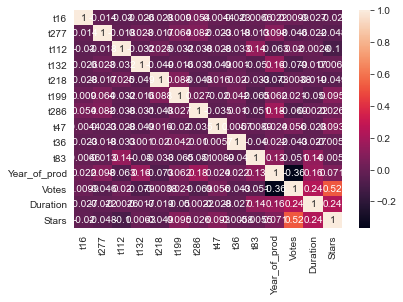

In [38]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrM, annot=True)
plt.show()

In [39]:
# print(friends2.Director.value_counts())

lst = ['Gary Halvorson',        
'Kevin Bright',          
'Michael Lembeck',       
'James Burrows',           
'Gail Mancuso',           
'Peter Bonerz',            
'David Schwimmer',         
'Ben Weiss']

def direr(wow):
    if wow not in lst:
        wow = wow.replace(wow,'Other')
    return wow

friends2['Director'] = friends2['Director'].apply(direr)

print(friends2.Director.value_counts())

Gary Halvorson     54
Kevin Bright       54
Other              43
Michael Lembeck    24
James Burrows      15
Gail Mancuso       14
Peter Bonerz       12
David Schwimmer    10
Ben Weiss          10
Name: Director, dtype: int64


In [52]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[1::-1]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = LinearRegression()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=cv, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.30414062232751493 0.24315648926089023


In [41]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = LinearRegression()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4601473462865432 0.059412119625408294


In [42]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = LinearRegression()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.42238689134705404 0.04159380506501158


In [31]:
# import joblib
# filename = 'nmf_books_friends.sav'
# joblib.dump(nmf, filename)

['nmf_books_friends.sav']

### SVR

In [43]:
from sklearn.svm import SVR

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

reg = SVR()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4209709651377519 0.04900406499839548


In [51]:
from sklearn.svm import SVR

Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = SVR()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4269642548856371 0.06804596026969317


In [78]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = SVR()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.41355260347536077 0.054011321600815024


In [79]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[1::-1]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = SVR()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4229000071383643 0.06739912152089038


In [80]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = SVR()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4256167722242978 0.053832344041550656


In [81]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = SVR()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4243136464831898 0.051222479025645556


### gradient boosting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

feature_names = vectorizer.get_feature_names_out()
X = friends2.drop(columns=friends.columns.tolist())
y = friends2.Stars

reg = GradientBoostingRegressor()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4243307529303612 0.05454752391623509


In [72]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = GradientBoostingRegressor()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4743865021548091 0.05309363102278743


In [73]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]

feature_names = vectorizer.get_feature_names_out()
X = friends2[Best]
y = friends2.Stars

reg = GradientBoostingRegressor()
scal = StandardScaler()

pipe = make_pipeline(reg, scal)

scores = cross_val_score(reg, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4626873499655191 0.05295926483927544


In [82]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[1::-1]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = GradientBoostingRegressor()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4519760133963449 0.09862278303568002


In [76]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:25]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = GradientBoostingRegressor()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.4645101793031987 0.05817339521301511


In [77]:
Best = [f't{topic_idx}' for topic_idx in np.argsort(F)[::-1][:10]]
xtra = ['Year_of_prod', 'Duration', 'Director']

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cols = Best+xtra

X = friends2[cols]
y = friends2.Stars

reg = GradientBoostingRegressor()
hot = OneHotEncoder()
scal = StandardScaler()

categorical_features = X.select_dtypes(include="object").columns
integer_features = X.select_dtypes(exclude="object").columns

prep = make_column_transformer((hot, categorical_features),
                                (scal, integer_features))

pipe = make_pipeline(prep,reg)

scores = cross_val_score(pipe, X, y, cv=10, scoring = 'neg_root_mean_squared_error')

print(np.mean(scores), np.std(scores))

-0.42918556542695996 0.06242421122639609
